# Exercise 03 : Bar charts

In [12]:
import pandas as pd
import sqlite3

In [13]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

## two graphs (commits VS working days and weekends) in one picture

- analyze only the users and not the admins
- the fontsize and the figsize remain the same
- for each hour, calculate the average number of commits on working days and on weekends (if there were no commits in an hour, do not use it to calculate the average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue,17-18: 6 commits, Wed, 17-18: 7 commits
- choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [14]:
commit_df = pd.io.sql.read_sql("SELECT timestamp as date FROM checker WHERE uid LIKE 'user_%'", connection)
commit_df['date']=pd.to_datetime(commit_df['date'])
commit_df

,date
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [15]:
commit_df['hour']=commit_df['date'].dt.hour
commit_df['day']=commit_df['date'].dt.day
commit_df['weekday']=commit_df['date'].dt.weekday
commit_df['WorkingOrNot']=commit_df['weekday'].apply(lambda x: 'working_day' if x<5 else 'weekend')
commit_df['count'] = 0
commit_df

,date,hour,day,weekday,WorkingOrNot,count
0,2020-04-17 05:19:02.744528,5,17,4,working_day,0
1,2020-04-17 05:22:35.249331,5,17,4,working_day,0
2,2020-04-17 05:22:45.549397,5,17,4,working_day,0
3,2020-04-17 05:34:14.691200,5,17,4,working_day,0
4,2020-04-17 05:34:24.422370,5,17,4,working_day,0
...,...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,20,21,3,working_day,0
3203,2020-05-21 20:22:41.785725,20,21,3,working_day,0
3204,2020-05-21 20:22:41.877806,20,21,3,working_day,0
3205,2020-05-21 20:37:00.129678,20,21,3,working_day,0


In [16]:
result = commit_df.groupby(['WorkingOrNot', 'day', 'hour'])['count'].size().reset_index()
result

,WorkingOrNot,day,hour,count
0,weekend,2,7,3
1,weekend,2,8,1
2,weekend,2,9,2
3,weekend,2,10,1
4,weekend,2,11,84
...,...,...,...,...
277,working_day,30,10,8
278,working_day,30,11,1
279,working_day,30,15,4
280,working_day,30,18,11


In [17]:
result = result.groupby(['WorkingOrNot', 'hour']).mean(numeric_only=True)['count'].rename('commits').reset_index()
result.head()

,WorkingOrNot,hour,commits
0,weekend,0,2.0
1,weekend,1,6.0
2,weekend,3,1.0
3,weekend,5,2.0
4,weekend,7,4.0


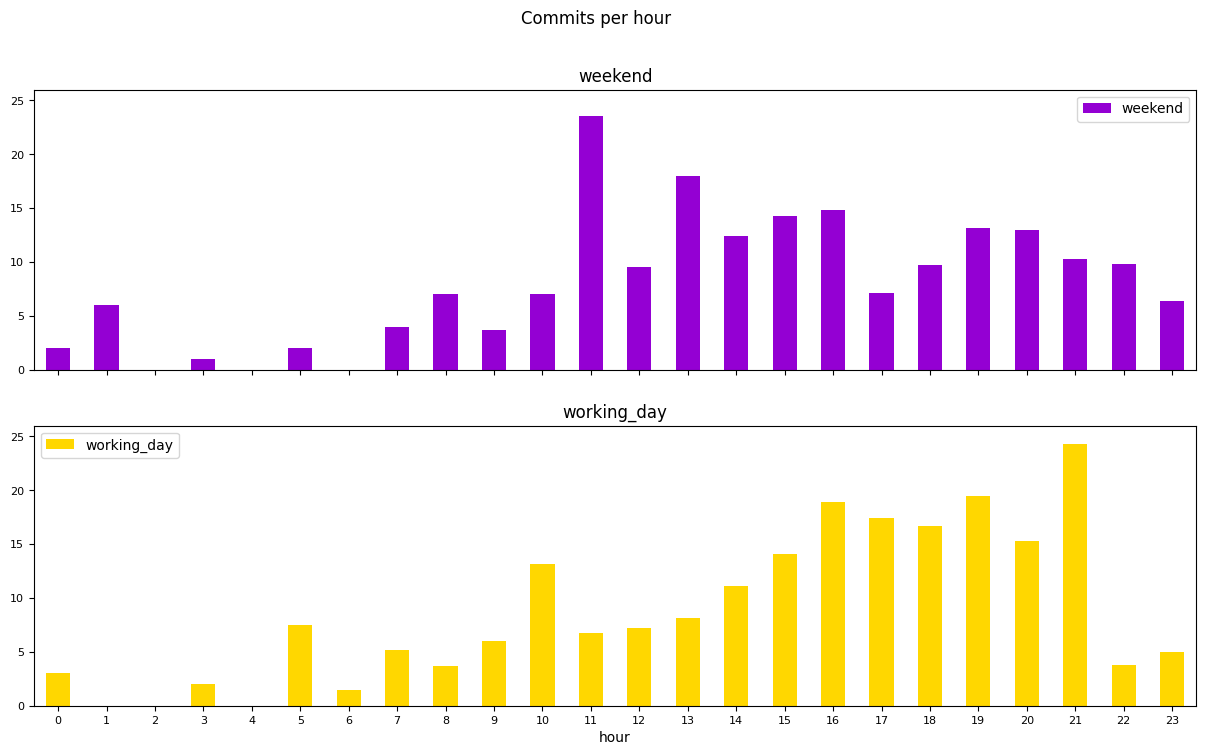

In [18]:
pivot = pd.pivot(result, index='hour', columns='WorkingOrNot', values='commits')

all_hours = pd.Index(range(0, 24), name='hour')
pivot = pivot.reindex(all_hours, fill_value=0)

colors = ['darkviolet', 'gold']
axes = pivot.plot(kind='bar', 
           subplots=True, 
           figsize=(15, 8), 
           fontsize=8, rot=0, 
           title='Commits per hour', 
           color=colors,
           sharey=True
           )

for ax in axes:
    ax.set_xlim(-0.5, 23.5)
    ax.set_ylim(0, 26)
    ax.set_xticks(range(0, 24, 1))
    ax.set_yticks(range(0, 26, 5))
    ax.set_xlabel('hour') 

## Is the dynamic different on working days and weekends?
## the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.

## during working days: 21

In [19]:
max_value1 = pivot['working_day'].idxmax()
max_value1

21

## during weekend: 11

In [20]:
max_value2 = pivot['weekend'].idxmax()
max_value2

11

In [21]:
connection.close()